In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# import online data 
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
# input variables ya feature
print(digits.data.shape) # means 1797 pictures size 64=8*8
print(digits.target.shape)# output labels(y)

(1797, 64)
(1797,)


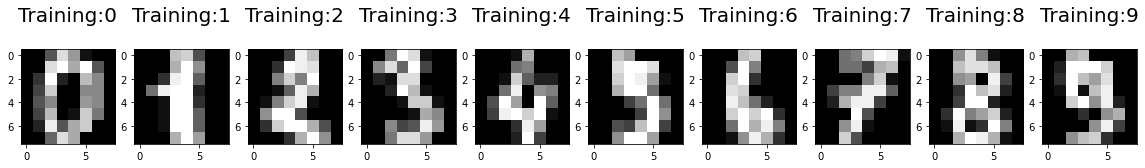

In [4]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1,10,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training:%i\n' % label,fontsize=20)

In [5]:
# help(plt)

In [6]:
# split the data 
from sklearn.model_selection import train_test_split
X=digits.data
y=digits.target

In [7]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
print('Train input data:',X_train.shape)
print('Test input data:',X_test.shape)
print('Train input data:',y_train.shape)
print('Test input data:',y_test.shape)

Train input data: (1437, 64)
Test input data: (360, 64)
Train input data: (1437,)
Test input data: (360,)


In [9]:
# model train
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,y_train)
model

c:\Users\Muhammad Mudassir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
model.predict(X_test[0:4])

array([2, 8, 2, 6])

In [11]:
prediction=model.predict(X_test)

In [12]:
# accuracy test 
score = model.score(X_test,y_test)
print('The accuracy score is :',score)

The accuracy score is : 0.9666666666666667


In [13]:
# Confusion Matrix
from sklearn import metrics 
cm = metrics.confusion_matrix(y_test,prediction)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

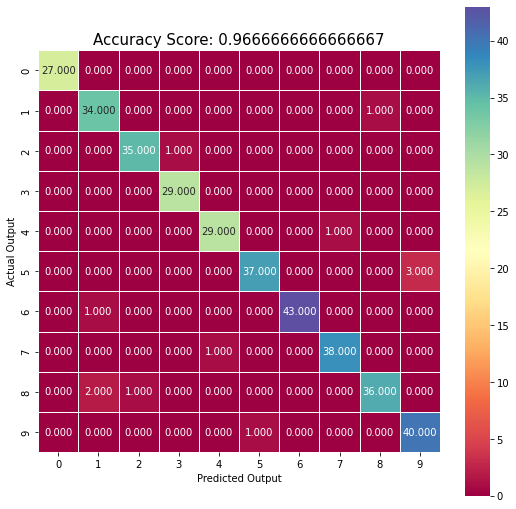

In [14]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=.5,square=True,cmap='Spectral');
plt.ylabel('Actual Output')
plt.xlabel('Predicted Output')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size = 15);

In [15]:
# Getting Mis Classified Labels
index=0 
misclassifiedIndexes=[]
for label,predict in zip(y_test,prediction):
    if label != predict:
        misclassifiedIndexes.append(index)
        index+=1

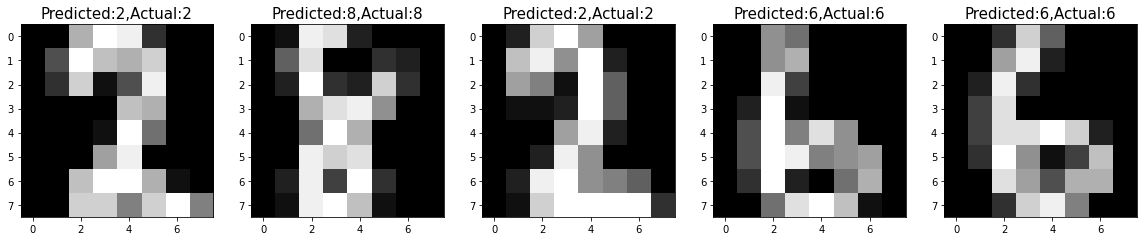

In [16]:
# Plotting MisClassified Labels with known Labels
plt.figure(figsize=(20,4))
for plotIndex,badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(X_test[badIndex],(8,8)),cmap=plt.cm.gray)
    plt.title('Predicted:{},Actual:{}'.format(prediction[badIndex],y_test[badIndex]),fontsize=15)